In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Exemplo de dados
data = pd.DataFrame({
    'Potência': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    'Eficiência': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    'Idade': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    'Tamanho': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    'Consumo de Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
})

In [58]:
# Verificar valores ausentes nos dados originais
print("Valores ausentes no DataFrame original:")
print(data.isna().sum())

Valores ausentes no DataFrame original:
Potência              0
Eficiência            0
Idade                 0
Tamanho               0
Consumo de Energia    0
dtype: int64


In [59]:
# Codificação da variável de destino
data['Consumo de Energia'] = data['Consumo de Energia'].map({'Eficiente': 1, 'Ineficiente': 0})

In [60]:
# Verificar valores ausentes após codificação
print("Valores ausentes após codificação:")
print(data.isna().sum())

Valores ausentes após codificação:
Potência              0
Eficiência            0
Idade                 0
Tamanho               0
Consumo de Energia    0
dtype: int64


In [61]:
# Separando características e variável de destino
X = data[['Potência', 'Eficiência', 'Idade', 'Tamanho']]
y = data['Consumo de Energia']

In [62]:
# Verificar valores ausentes em X e y
print("Valores ausentes em X:")
print(X.isna().sum())
print("Valores ausentes em y:")
print(pd.isna(y).sum())

Valores ausentes em X:
Potência      0
Eficiência    0
Idade         0
Tamanho       0
dtype: int64
Valores ausentes em y:
0


In [63]:
# Remover linhas com valores ausentes (se necessário)
data = data.dropna()
X = data[['Potência', 'Eficiência', 'Idade', 'Tamanho']]
y = data['Consumo de Energia']

In [64]:
 # Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [65]:
# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Treinamento do modelo
model = SVC(kernel='linear')  # Você pode experimentar outros kernels
model.fit(X_train, y_train)

SVC(kernel='linear')

In [67]:
# Predições e Avaliação
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

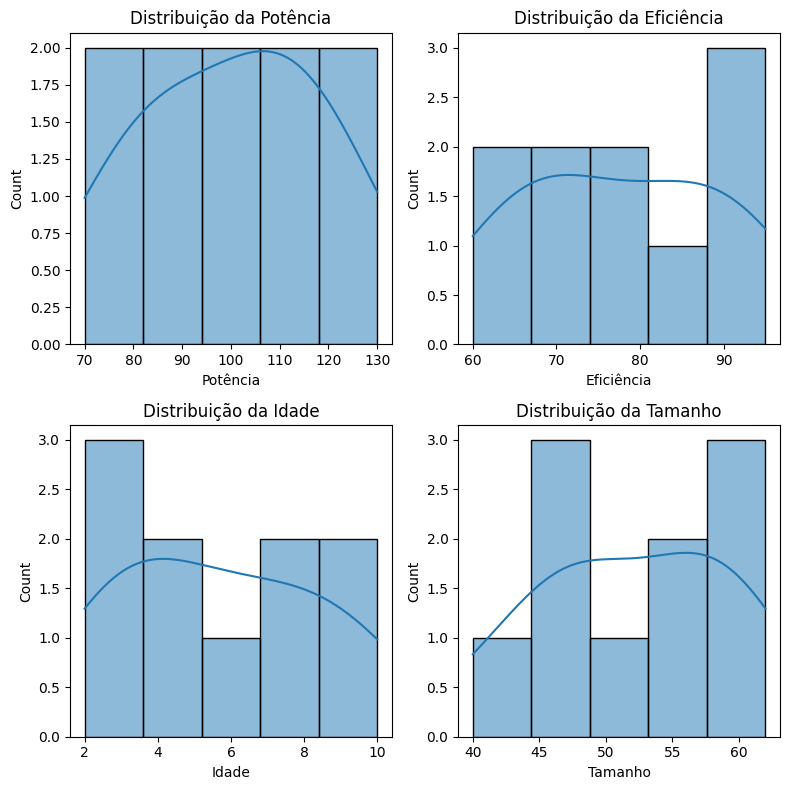

In [68]:
# Plotando histogramas das características
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição da {col}')

plt.tight_layout()
plt.show()

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


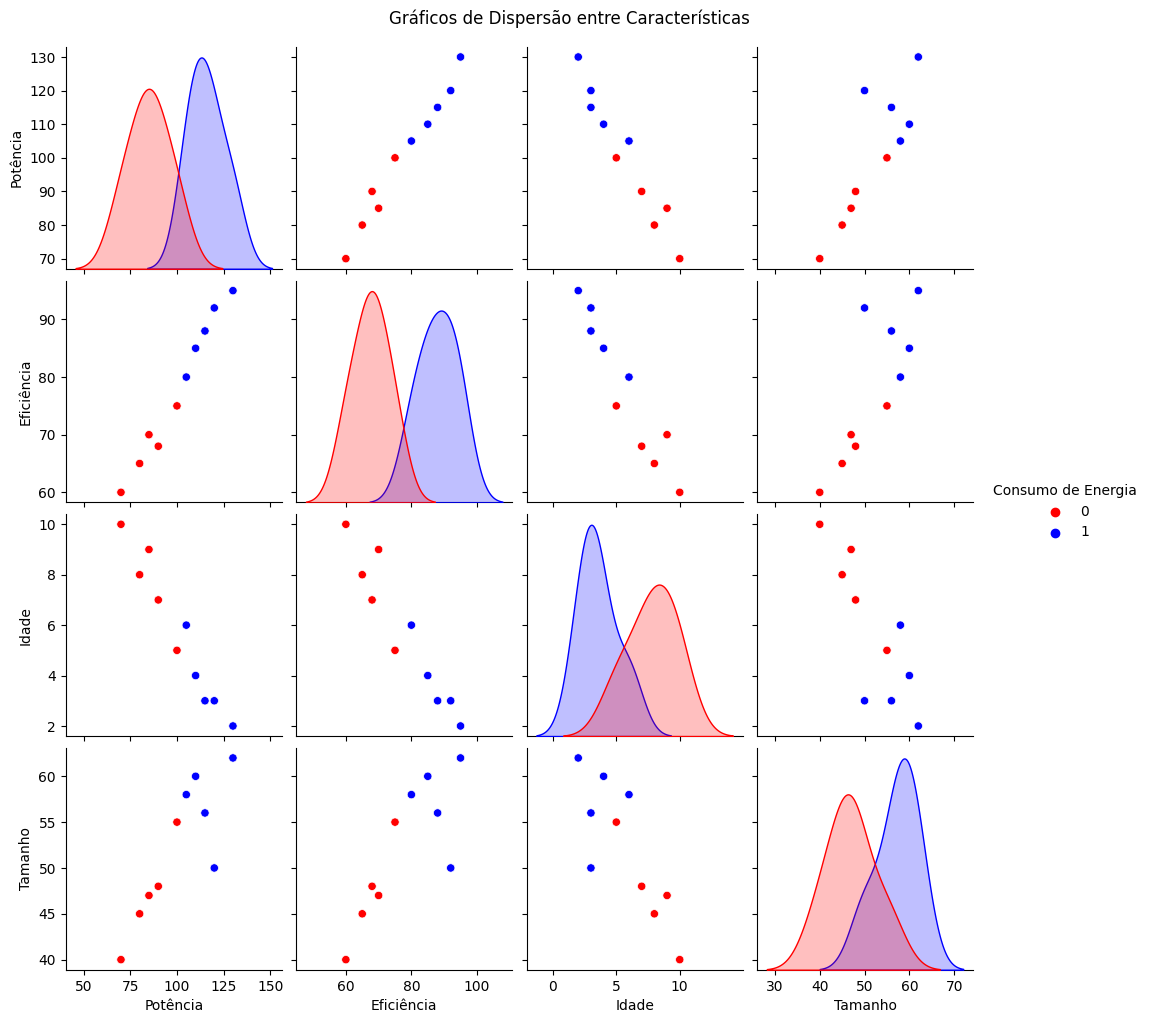

In [69]:
# Plotando gráficos de dispersão entre pares de características
sns.pairplot(data, hue='Consumo de Energia', palette={1: 'blue', 0: 'red'})
plt.suptitle('Gráficos de Dispersão entre Características', y=1.02)
plt.show()

Text(70.72222222222221, 0.5, 'Real')

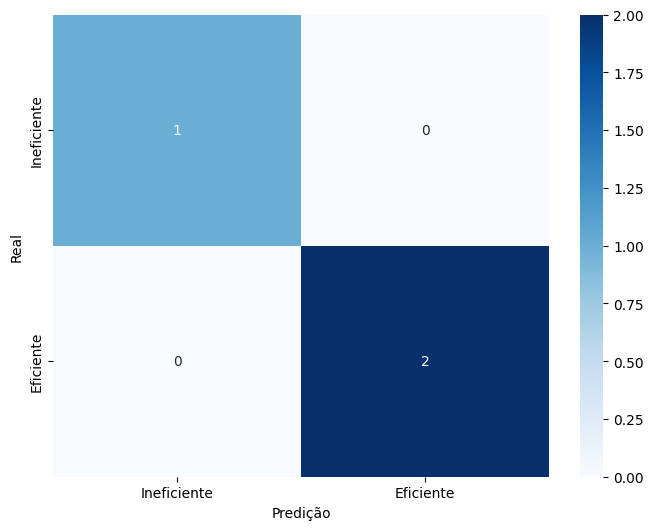

In [70]:
# Plotando a matriz de confusão
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=['Ineficiente', 'Eficiente'], 
            yticklabels=['Ineficiente', 'Eficiente'])
ax.set_xlabel('Predição')
ax.set_ylabel('Real')


In [71]:
# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

